# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [67]:
# Install required packages (if not available on server)
!pip install getdist
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

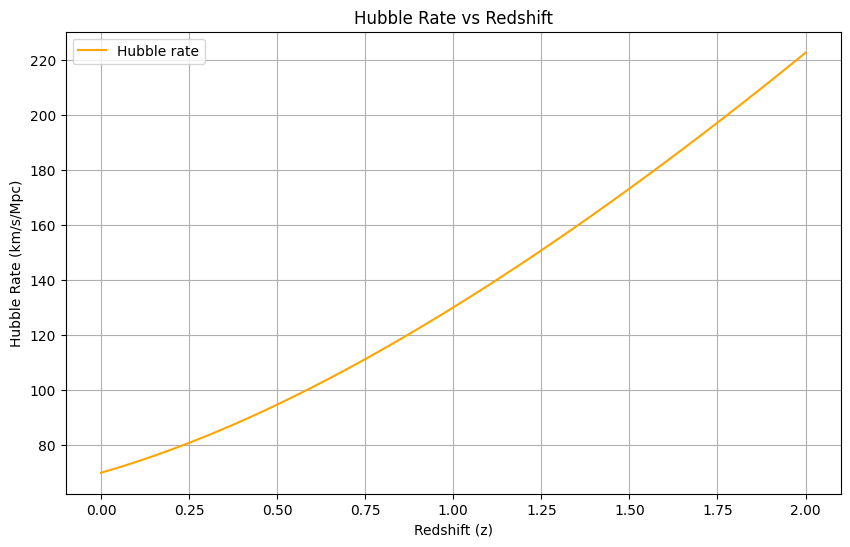

Hubble rate for z=0.2: 78.4124990036665 km/s/Mpc


In [68]:
PARSEC = 3.086 * 10**16 #m
H0 = 70 #kg/s/Mpc

# Initial guesses
OmegaL = 0.65
OmegaM = 0.35


# Hubble rate function
def Hubble(z, H, OmegaL, OmegaM): 
    OmegaK = 1-OmegaL-OmegaM

    H = H * np.sqrt(OmegaM * (1 + z)**3 + OmegaL + OmegaK * (1 + z)**2)
    return H

z = 0.2

# Plotting the Hubble rate function against the redshift
z_values = np.linspace(0, 2, 100) 
hubble_rates = Hubble(z_values, H0, OmegaL, OmegaM)

# Plotting of the Hubble rate
plt.figure(figsize=(10, 6))
plt.plot(z_values, hubble_rates, label = 'Hubble rate', color='orange')
plt.title('Hubble Rate vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Hubble Rate (km/s/Mpc)')
plt.grid()
plt.legend()
plt.show()

# Test the Hubble rate function
print(f"Hubble rate for z={z}: {Hubble(z, H0, OmegaL, OmegaM)} km/s/Mpc")

As is evident from the plot, the Hubble rate follows the expected trend.

##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

In [69]:
from scipy.integrate import quad # Taken from ChatGPT

SPEED_OF_LIGHT = 2.99e5 # km/s

# Luminosity distance function
def dL(z, OmegaM, OmegaL, H0, c):
    OmegaK = 1 - OmegaL - OmegaM

    # Calculate the integral Dz
    Integral, _ = quad(lambda x: 1 / Hubble(x, H0, OmegaL, OmegaM), 0, z)
    Dz = Integral * H0

    # Determine which universe
    if OmegaK > 0:
        dL = (c / H0) * (1 + z) * (1 / np.sqrt(OmegaK)) * np.sinh(np.sqrt(OmegaK) * Dz)
    elif OmegaK == 0:
        dL = (c / H0) * (1 + z) * Dz
    else: 
        dL = (c / H0) * (1 + z) * (1 / np.sqrt(-OmegaK)) * np.sin(np.sqrt(-OmegaK) * Dz)
    
    return dL

# Test the Luminosity distance function
print(f"Test for dL with z={z}: {dL(z, OmegaM, OmegaL, H0, SPEED_OF_LIGHT)} Mpc")

Test for dL with z=0.2: 970.3645453477906 Mpc


Let's plot the luminosity distance and distance modulus to see what trends they follow to see if the functions are working correctly.

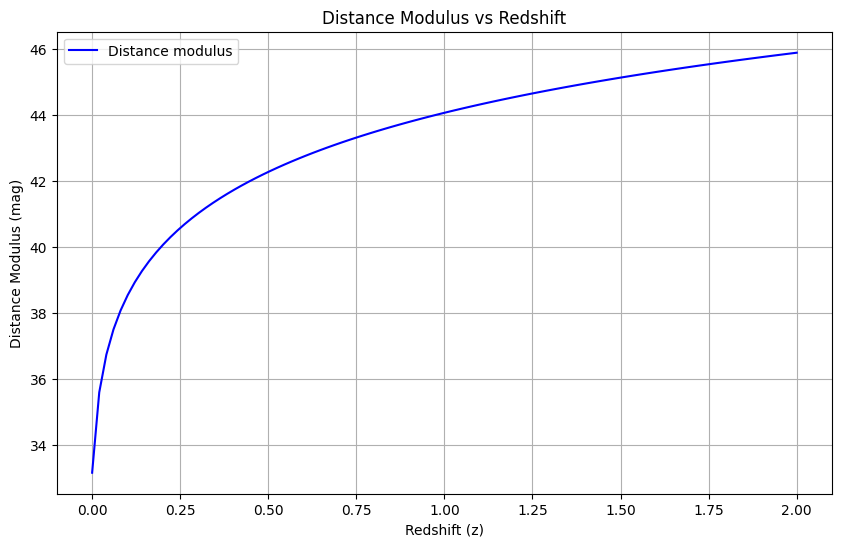

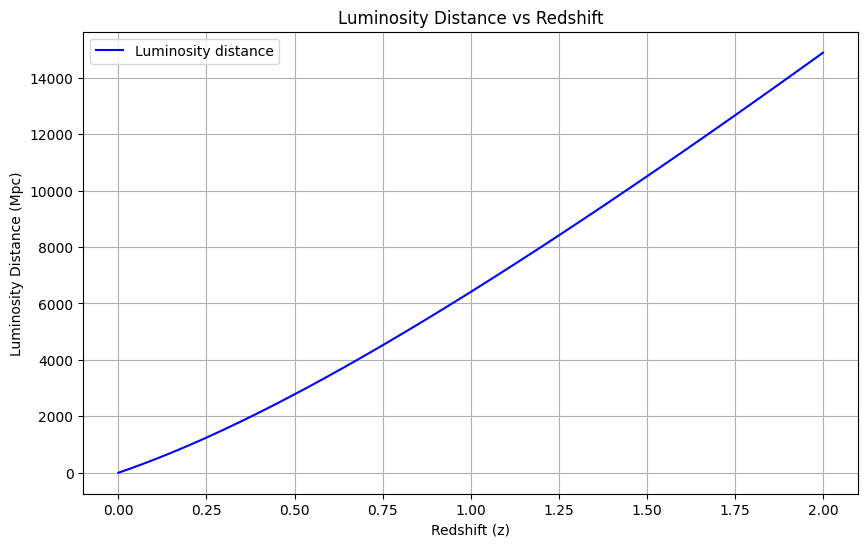

In [70]:
# Function for calculating the distance modulus
def theor_distance_modulus(z, H0, OmegaM, OmegaL):
    distance_modulus = np.zeros_like(z) # Inspired by ChatGPT
    # Plot the distance modulus against redshift
    for i in range(len(z)):
        # Calculations with pc and not Mpc
        distance_modulus[i] = 5. * (-1. + np.log10(dL(z[i], OmegaM, OmegaL, H0, SPEED_OF_LIGHT)*10**6))
    return distance_modulus

# Generate redshift values
z_values = np.linspace(0, 2, 100) 
# Redshift starts at non-zero so no errors in the log function
distance_modulus_values = theor_distance_modulus(z_values+0.01, H0, OmegaM, OmegaL)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z_values, distance_modulus_values, label = 'Distance modulus', color='blue')
plt.title('Distance Modulus vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mag)')
plt.grid()
plt.legend()
plt.show()

# Plot the luminosity distance against the red shift
luminosity_distance_values = np.array([dL(z, OmegaM, OmegaL, H0, SPEED_OF_LIGHT) for z in z_values])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z_values, luminosity_distance_values, label = 'Luminosity distance', color='blue')
plt.title('Luminosity Distance vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance (Mpc)')
plt.grid()
plt.legend()
plt.show()

As is evident from the plots, the luminosity distance and distance modulus follow the same trend as the data gathered from the MCMC model.

## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [71]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [72]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [73]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

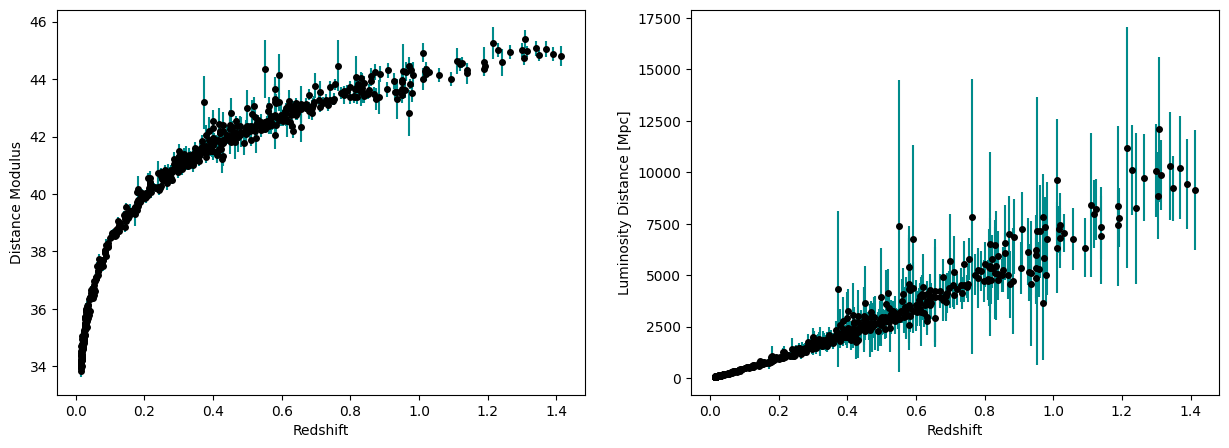

In [74]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

In the following code we are going to take random parameters and calculate what the luminosity distance is. We then compare that to the actual luminosity distance we got from the MCMC model and determine the X^2 value and likelihood. We then randomly update the parameters and again calculate the luminosity distance and again compare it to the actual data and perform a X^2 and likeilihood calculation. We than compare the old parameters with the new parameters and determine which of these is better. If the new ones are good enough we store the parameters and use them again as the old parameters for the new iteration of the loop and the process begins agai. If the old parameters are better, the system keeps the old parameters and goes through the iteration again.

In [75]:
# Determine the old variables
theta_old = [H0, OmegaM, OmegaL]

# Number of steps to look for parameters
n_steps = 3000

# Standard Deviation for the changing variables
proposal_std = [0.04, 0.04, 0.04]


z_values =  data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

# Convert distance to parsecs
dpc = 10. * 10.**(dist_mod / 5.)
# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

# Initialise the accepted parameters and X^2 values
accepted_params = []
accepted_X2 = []



# Function for making the dL predictions
def make_predictions(z_value, H, OmegaM, OmegaL, c):
    validate_parameters(H, OmegaM, OmegaL)
    return dL(z_value, OmegaM, OmegaL, H, c)
    
# Function for calculating the X^2 values
def chi_squared(dL_pred, dMpc, z_values, dMe):
    X2 = 0
    for i in range(len(z_values)):
        X2 += (dL_pred[i]-dMpc[i])**2/ dMe[i]**2
    return X2

# Function for calculating the likelihood
def likelihood(X2):
    return  np.exp(-0.5* X2)

# Function for determining the new parameters
def propose_new_params(theta_old, proposal_std):
    return np.array(theta_old) + np.random.normal(0, proposal_std)

# Function for checking the new parameters before making predictions
def validate_parameters(H0, OmegaM, OmegaL):
    if H0 <= 0:
        raise ValueError("H0 must be positive.")
    if OmegaM < 0 or OmegaM > 1:
        raise ValueError("OmegaM must be between 0 and 1.")
    if OmegaL < 0 or OmegaL > 1:
        raise ValueError("OmegaL must be between 0 and 1.")
    if OmegaM + OmegaL > 1:
        raise ValueError("The sum of OmegaM and OmegaL must not exceed 1.")

# Function for printing a few values to see how the predictions look like
def print_n_pred():
    dL_pred = []
    for i in range(len(z_values)):
        dL_pred.append(make_predictions(z_values[i], theta_old[0], theta_old[1], theta_old[2], SPEED_OF_LIGHT))

    dL_pred = np.array(dL_pred)

    X2 = chi_squared(dL_pred, dMpc, z_values, dMe)

    likelihood_value = likelihood(X2)

    for i in range (3):
        print(f"z_values{i} : {z_values[i]}")
        print(f"dl_pred{i} : {dL_pred[i]}")
        print(f"dMpc{i} : {dMpc[i]}")
        print(f"dMe{i} : {dMe[i]}")
    print(f"X2: {X2}")
    print(f"Likelihood: {likelihood_value}")

print_n_pred()



# Main loop for finding the right parameters
for step in range(n_steps):
    
    # Make predictions with the previous parameters
    dL_pred_old = []
    for i in range(len(z_values)):
        dL_pred_old.append(make_predictions(z_values[i], theta_old[0], theta_old[1], theta_old[2], SPEED_OF_LIGHT))

    dL_pred_old = np.array(dL_pred_old)

    # Calculating the X^2 for the old parameters
    X2_old = 0
    X2_old = chi_squared(dL_pred_old, dMpc, z_values, dMe)

    # Calculating the likelihood for the old parameters
    likelihood_old = likelihood(X2_old)


    # Make new parameters but check if the parameters are physically possible
    while True:
        # Create new parameters
        theta_new = propose_new_params(theta_old, proposal_std)
        OmegaM_new, OmegaL_new = theta_new[1], theta_new[2]

        # Check the parameters are within the right range
        if (OmegaM_new < 0 or OmegaM_new > 1) or (OmegaL_new < 0 or OmegaL_new > 1) or (OmegaM_new + OmegaL_new > 1):
            continue  # If the parameters are invalid create new ones
        else:
            break  # If the parameters are okay continue the main loop

    # Making predictions for the new parameters
    dL_pred_new = []
    for i in range(len(z_values)):
        dL_pred_new.append(make_predictions(z_values[i], theta_new[0], theta_new[1], theta_new[2], SPEED_OF_LIGHT))

    dL_pred_new = np.array(dL_pred_new)

    # Calculating the X^2 values for the new parameters
    X2_new = 0
    X2_new = chi_squared(dL_pred_new, dMpc, z_values, dMe)

    # Calculating the likelihood for the new parameters
    likelihood_new = likelihood(X2_new)

    # Calculate the acceptance probability of the new paramters compared with the old parameters
    acceptance_probability = np.exp((X2_old**2 - X2_new**2) / 2)*(likelihood_new/likelihood_old)

    # Random value between 0 and 1 
    r = np.random.rand()

    # Check if the new parameters are good enough
    if r < acceptance_probability:
        # If the new parameters are better than the old paramer=ters, keep the new parameters
        theta_old = theta_new
        OmegaK = 1- theta_new[1]-theta_new[2] 
        # Store the accepted parameters
        accepted_params.append([theta_new[0], theta_new[1], theta_new[2], OmegaK])
        accepted_X2.append(X2_new)
        print(f"Accepted params: H: {theta_new[0]}, OmegaM: {theta_new[1]}, OmegaL: {theta_new[2]}, OmegaK: {OmegaK}") 
    # If the old parameters are better than the new, keep the old parameters
    else:
        theta_old=theta_old

# Create arrays for the accepted parameters, mean parameters and the standar deviation of the new parameters
accepted_params = np.array(accepted_params)
mean_params = np.mean(accepted_params, axis=0)
std_params = np.std(accepted_params, axis=0)

# Print the mean and standard deviation of the accepted parameters
print("Mean parameters:")
print(f"H0: {mean_params[0]}, OmegaM: {mean_params[1]}, OmegaL: {mean_params[2]}, OmegaK: {mean_params[3]}")
print("Standard deviations:")
print(f"H0: {std_params[0]}, OmegaM: {std_params[1]}, OmegaL: {std_params[2]}, OmegaK: {std_params[3]}")


z_values0 : 0.028488
dl_pred0 : 124.21154391299713
dMpc0 : 117.30504178865597
dMe0 : 24.234120938391435
z_values1 : 0.050043
dl_pred1 : 221.48469735671293
dMpc1 : 217.00692003069955
dMe1 : 33.37702113803868
z_values2 : 0.052926
dl_pred2 : 234.70529490344117
dMpc2 : 230.96078708735686
dMe2 : 33.161244314047025
X2: 136.869744306131
Likelihood: 1.9015714756282926e-30
Accepted params: H: 70.06763532690182, OmegaM: 0.29973730712907615, OmegaL: 0.6402860154711105, OmegaK: 0.05997667739981338
Accepted params: H: 70.11515006189515, OmegaM: 0.2180534597133263, OmegaL: 0.5989762818351035, OmegaK: 0.1829702584515701
Accepted params: H: 70.19698778763043, OmegaM: 0.24927509315840776, OmegaL: 0.6184772438151579, OmegaK: 0.13224766302643431
Accepted params: H: 70.23535690931718, OmegaM: 0.28169151754004834, OmegaL: 0.6793132914699356, OmegaK: 0.03899519099001614
Accepted params: H: 70.18305504587406, OmegaM: 0.29745916667387834, OmegaL: 0.6879345321982067, OmegaK: 0.014606301127914945
Accepted param

From the values we can see that the parameters are around the values we expect. H0 = 70.19 +- 0.04, Omega_m = 0.29 +- 0.01, Omega_L = 0.69 +- 0.02, Omega_k = 0.02 +- 0.03. The values are stored and can now be used to plot. 

After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

Version:  1.5.4
Shape of accepted_params: (54, 4)
Removed no burn in


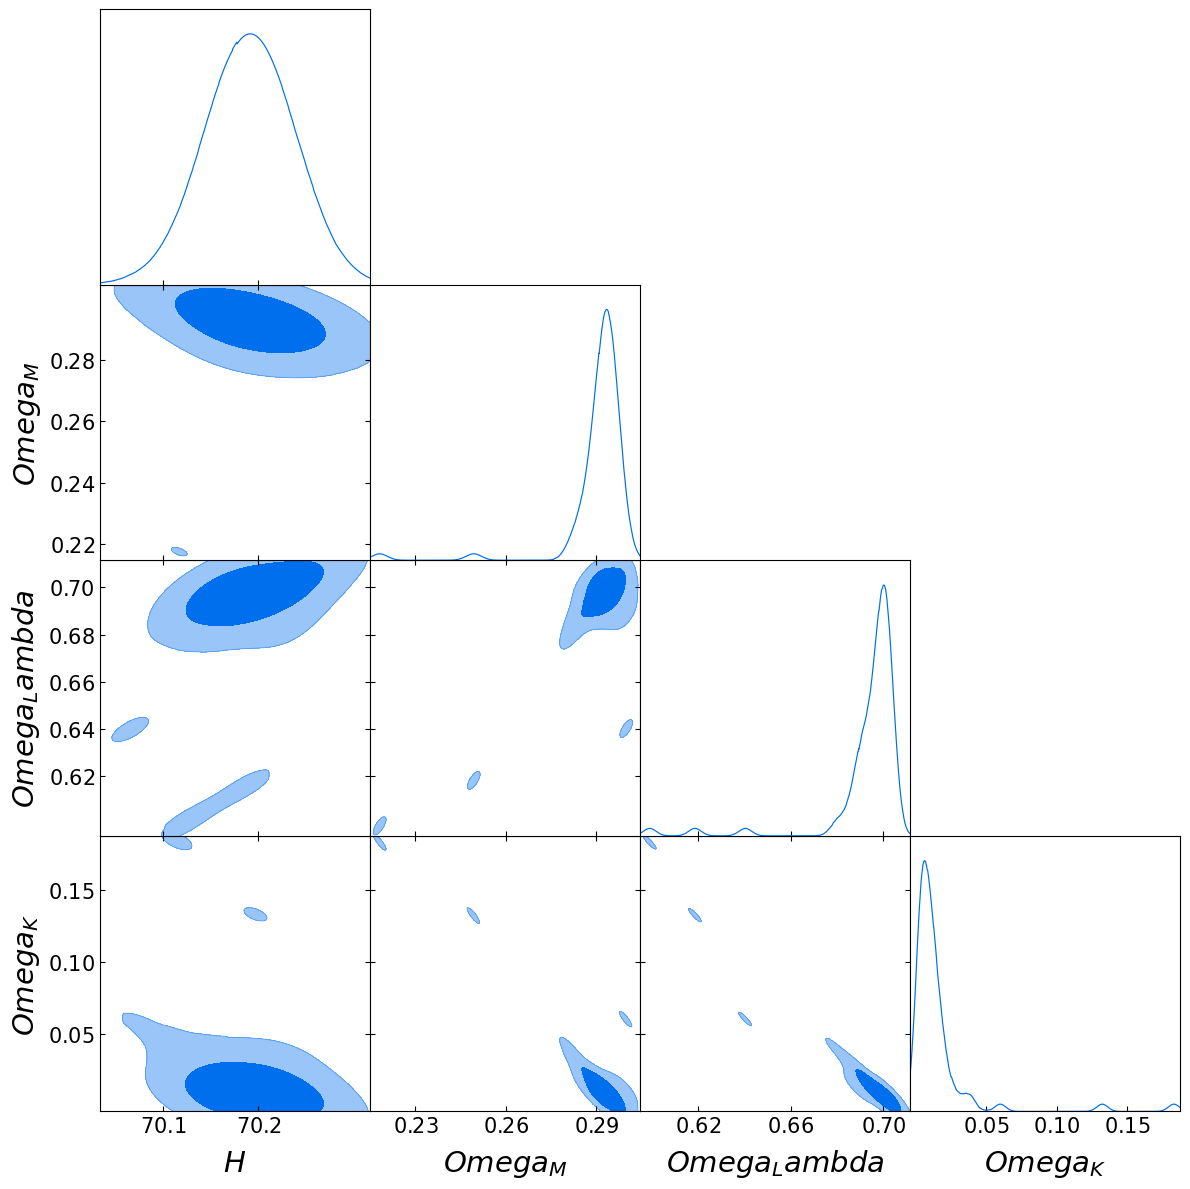

In [76]:
import getdist, IPython
from getdist import plots, MCSamples, loadMCSamples
print('Version: ',getdist.__version__)
import numpy as np
import pylab

# Check if the accepted parameters exist, inspired by ChatGPT
if 'accepted_params' not in locals():
    raise ValueError("accepted_params is not defined. Please run your MCMC process first.")

# Print the shape for extra confirmation
print("Shape of accepted_params:", accepted_params.shape)

# Label and name the parameters
my_labels = ['H', 'Omega_M', 'Omega_Lambda', 'Omega_K']
my_names = ['H', 'OmegaM', 'OmegaL', 'Omega_K']

# Call the parameters
my_samples = accepted_params

# Create an MCSample object
samples1 = MCSamples(samples = my_samples, labels = my_labels, names = my_names)

#Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(samples1, filled = True)

# Show the plot
pylab.show()

As is evidents from the plots, the distributions are fairly uniform and what we could expect. Now we can use the best parameters to make a plot for the luminosity distance against redshift. We can also look at the lowest and highest parameters to get an error around the best parametrs to show the unvertainty we have. 

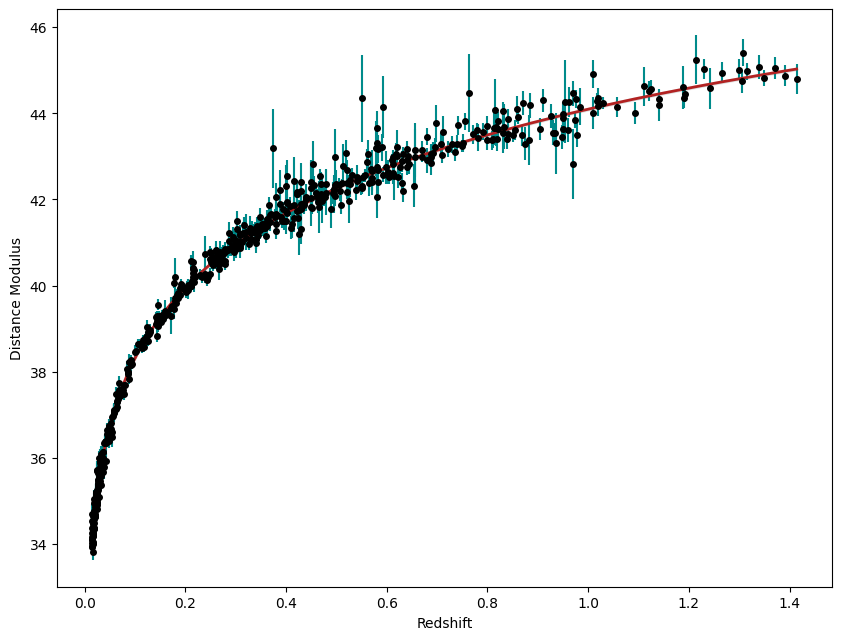

In [77]:
SPEED_OF_LIGHT = 299792.458 # in km/s

# Function for calculating the luminosity distance
def theor_luminosity_distance(z, h, OmegaM, OmegaL, OmegaK):
    return 10.**6 * SPEED_OF_LIGHT / h * (1.+z) * \
    integrate.quad(lambda x: 1. / np.sqrt(OmegaM * (1.+x)**3 + OmegaL +OmegaK *(1+x)**2), 0., z)[0]

# Function for calculating the distance modulus
def theor_distance_modulus(z, h, OmegaM, OmegaL, OmegaK):
    return 5. * (-1. + np.log10(theor_luminosity_distance(z, h, OmegaM, OmegaL, OmegaK)))

# Sort the redshift values                
zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

# Determine the best, highest and lowest values for the parameters
for z in zsort:
    # Best parameters
    best_fit_params = samples1.getMeans()
    h_best = best_fit_params[0]
    omega_m_best = best_fit_params[1]
    omega_l_best = best_fit_params[2]
    omega_k_best = best_fit_params[3]
    
    d_best_fit.append(theor_distance_modulus(z, h_best, omega_m_best, omega_l_best, omega_k_best))

    # Lowest and highest parameters
    h_min, h_max = np.percentile(samples1.samples[:, 0], [16, 84])
    omega_m_min, omega_m_max = np.percentile(samples1.samples[:, 1], [16, 84])
    omega_l_min, omega_l_max = np.percentile(samples1.samples[:, 2], [16, 84])
    omega_k_min, omega_k_max = np.percentile(samples1.samples[:, 3], [16, 84])

    d_min.append(theor_distance_modulus(z, h_min, omega_m_min, omega_l_min, omega_k_min))
    d_max.append(theor_distance_modulus(z, h_max, omega_m_max, omega_l_max, omega_k_max))


# Create the plot   
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

# Plot the original data points with error bars
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# PLot the graph for the best parameters and the error bounds
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2)
plt.show()

From the plot it is evident that the best parameters fit the best lines through all the points and the error, while tiny is present and increases with a bigger redshift. This results looks promising and the parameters are determined.